In [32]:
import os
from PIL import Image
import numpy as np
i=0

imgs = []
for file in os.listdir('images/'):
    img = Image.open('images/'+file)
    img_grey = img.convert("L")
    img_grey = img_grey.resize((64,64))
    imgs.append(np.array(img_grey))
    img_grey.save('gray/'+str(i)+'.jpg')
    i+=1

In [33]:
data = np.array(imgs)
data = np.expand_dims(data,axis=3)
data.shape

(240, 64, 64, 1)

In [36]:
roughness = []
num = 1.93
for i in range(240):
    roughness.append(num)
    num+=0.069
print(len(roughness))
roughness

240


[1.93,
 1.9989999999999999,
 2.068,
 2.137,
 2.206,
 2.275,
 2.344,
 2.413,
 2.4819999999999998,
 2.5509999999999997,
 2.6199999999999997,
 2.6889999999999996,
 2.7579999999999996,
 2.8269999999999995,
 2.8959999999999995,
 2.9649999999999994,
 3.0339999999999994,
 3.1029999999999993,
 3.1719999999999993,
 3.240999999999999,
 3.309999999999999,
 3.378999999999999,
 3.447999999999999,
 3.516999999999999,
 3.585999999999999,
 3.654999999999999,
 3.723999999999999,
 3.792999999999999,
 3.8619999999999988,
 3.9309999999999987,
 3.9999999999999987,
 4.068999999999999,
 4.137999999999999,
 4.206999999999999,
 4.275999999999999,
 4.344999999999999,
 4.413999999999999,
 4.482999999999999,
 4.551999999999999,
 4.620999999999999,
 4.689999999999999,
 4.758999999999999,
 4.8279999999999985,
 4.8969999999999985,
 4.965999999999998,
 5.034999999999998,
 5.103999999999998,
 5.172999999999998,
 5.241999999999998,
 5.310999999999998,
 5.379999999999998,
 5.448999999999998,
 5.517999999999998,
 5.58699

In [39]:
data = data.copy()
target = np.array(roughness)

Roughness :  3.516999999999999


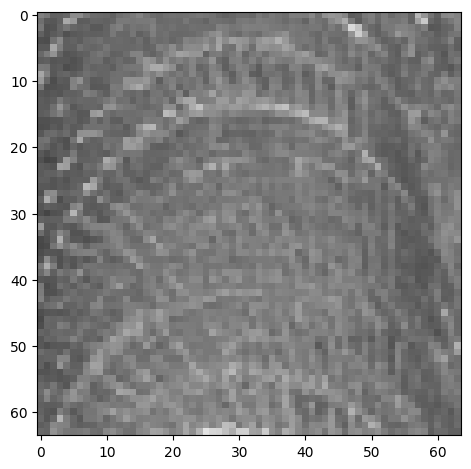

In [40]:
from skimage.io import imshow
imshow(data[23]);
print("Roughness : ",target[23])

In [50]:
import tensorflow as tf
from tensorflow import keras

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(data, target, epochs=100, batch_size=32)

Epoch 1/100
8/8 [==============================] - 3s 136ms/step - loss: -18541.5254 - accuracy: 0.0000e+00
Epoch 2/100
8/8 [==============================] - 1s 124ms/step - loss: -370702.3750 - accuracy: 0.0000e+00
Epoch 3/100
8/8 [==============================] - 1s 119ms/step - loss: -2732365.7500 - accuracy: 0.0000e+00
Epoch 4/100
8/8 [==============================] - 1s 120ms/step - loss: -12386899.0000 - accuracy: 0.0000e+00
Epoch 5/100
8/8 [==============================] - 1s 124ms/step - loss: -43157624.0000 - accuracy: 0.0000e+00
Epoch 6/100
8/8 [==============================] - 1s 117ms/step - loss: -126263880.0000 - accuracy: 0.0000e+00
Epoch 7/100
8/8 [==============================] - 1s 127ms/step - loss: -317698080.0000 - accuracy: 0.0000e+00
Epoch 8/100
8/8 [==============================] - 1s 121ms/step - loss: -735702464.0000 - accuracy: 0.0000e+00
Epoch 9/100
8/8 [==============================] - 1s 118ms/step - loss: -1571308288.0000 - accuracy: 0.0000e+00
Ep

8/8 [==============================] - 1s 115ms/step - loss: -494441634725888.0000 - accuracy: 0.0000e+00
Epoch 72/100
8/8 [==============================] - 1s 117ms/step - loss: -534088813379584.0000 - accuracy: 0.0000e+00
Epoch 73/100
8/8 [==============================] - 1s 119ms/step - loss: -574915262545920.0000 - accuracy: 0.0000e+00
Epoch 74/100
8/8 [==============================] - 1s 118ms/step - loss: -618253764263936.0000 - accuracy: 0.0000e+00
Epoch 75/100
8/8 [==============================] - 1s 121ms/step - loss: -664086165585920.0000 - accuracy: 0.0000e+00
Epoch 76/100
8/8 [==============================] - 1s 118ms/step - loss: -712994703015936.0000 - accuracy: 0.0000e+00
Epoch 77/100
8/8 [==============================] - 1s 119ms/step - loss: -763278569504768.0000 - accuracy: 0.0000e+00
Epoch 78/100
8/8 [==============================] - 1s 122ms/step - loss: -818370987425792.0000 - accuracy: 0.0000e+00
Epoch 79/100
8/8 [==============================] - 1s 117ms/

In [51]:
model.save('surface_model.h5')

In [54]:
img = Image.open('gray/1.jpg')
img_grey = img.convert("L")
img_grey = img_grey.resize((64,64))
imgs = np.array(img_grey)
imgs.shape

(64, 64)

In [55]:
data = np.reshape(imgs,(1,64,64,1))

In [56]:
data.shape

(1, 64, 64, 1)

In [59]:
a = model.predict(data)

1/1 [==============================] - 0s 55ms/step


In [61]:
a[0][0]

1.0